# 🧩 Import Libraries

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
!pip install --upgrade protobuf==3.20.*
!pip install --upgrade tensorflow==2.12.0
!pip install --upgrade keras==2.12.
!pip install tensorflow opencv-python numpy



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.1/162.1 kB 4.7 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 6.33.0
    Uninstalling protobuf-6.33.0:
      Successfully uninstalled protobuf-6.33.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
bigframes 2.12.0 requires google-cloud-bigquery-storage<3.0.0,>=2.30.0, which is not installed.
opentelemetry-proto 1.37.0 requires protobuf<7.0,>=5.0, but you have protobuf 3.20.3 which is incompatible.
onnx 1.18.0 requires protobuf>=4.25.1, but you have protobuf 3.20.3 which is incompatible.
a2a-sdk 0.3.10 requires protobuf>=5.29.5, but you have protobuf 3.20.3 which is incompatible.
ray 2.51.1 requires click!=8.3.0,>=7.0, but you have click 8.3.0 which is incompatible.
bigframes 2.12.0 requires rich<14,>=12.4.4, but you have rich 14.2.0 which is incompatible.
tensorflow-me

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import os
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical



# 🗂️ Dataset Path


In [4]:

data_dir = "/kaggle/input/fer2013/train"  # change this if needed
test_dir = "/kaggle/input/fer2013/test"


# 🧼 Data Preprocessing

In [5]:
img_size = 48
batch_size = 64

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_data = train_datagen.flow_from_directory(
    data_dir,
    target_size=(img_size, img_size),
    color_mode='grayscale',
    batch_size=batch_size,
    class_mode='categorical'
)

test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_size, img_size),
    color_mode='grayscale',
    batch_size=batch_size,
    class_mode='categorical'
)

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [6]:
# 🔍 Check Class Labels
print(train_data.class_indices)

{'angry': 0, 'disgust': 1, 'fear': 2, 'happy': 3, 'neutral': 4, 'sad': 5, 'surprise': 6}


# 🧠 Build CNN Model

In [7]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(48,48,1)),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(7, activation='softmax')  # 7 emotions
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# 📚 Model Summary


In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 46, 46, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 23, 23, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 21, 21, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 10, 10, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 8, 8, 128)         73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 4, 4, 128)        0

# 🚀 Train the Model

In [9]:
epochs = 30
history = model.fit(
    train_data,
    validation_data=test_data,
    epochs=epochs
)

Epoch 1/30
449/449 [==============================] - 153s 339ms/step - loss: 1.7340 - accuracy: 0.2985 - val_loss: 1.5542 - val_accuracy: 0.4048
Epoch 2/30
449/449 [==============================] - 56s 125ms/step - loss: 1.5283 - accuracy: 0.4085 - val_loss: 1.4120 - val_accuracy: 0.4539
Epoch 3/30
449/449 [==============================] - 56s 125ms/step - loss: 1.4132 - accuracy: 0.4562 - val_loss: 1.3363 - val_accuracy: 0.4857
Epoch 4/30
449/449 [==============================] - 56s 124ms/step - loss: 1.3377 - accuracy: 0.4911 - val_loss: 1.2881 - val_accuracy: 0.5038
Epoch 5/30
449/449 [==============================] - 58s 130ms/step - loss: 1.2759 - accuracy: 0.5196 - val_loss: 1.2298 - val_accuracy: 0.5332
Epoch 6/30
449/449 [==============================] - 56s 124ms/step - loss: 1.2271 - accuracy: 0.5348 - val_loss: 1.2062 - val_accuracy: 0.5401
Epoch 7/30
449/449 [==============================] - 57s 128ms/step - loss: 1.1813 - accuracy: 0.5558 - val_loss: 1.1840 - val_a

# 💾 Save the Model

In [10]:
model.save("emotion_model.h5")
print("Model saved successfully!")

Model saved successfully!


# 📈 Plot Accuracy and Loss

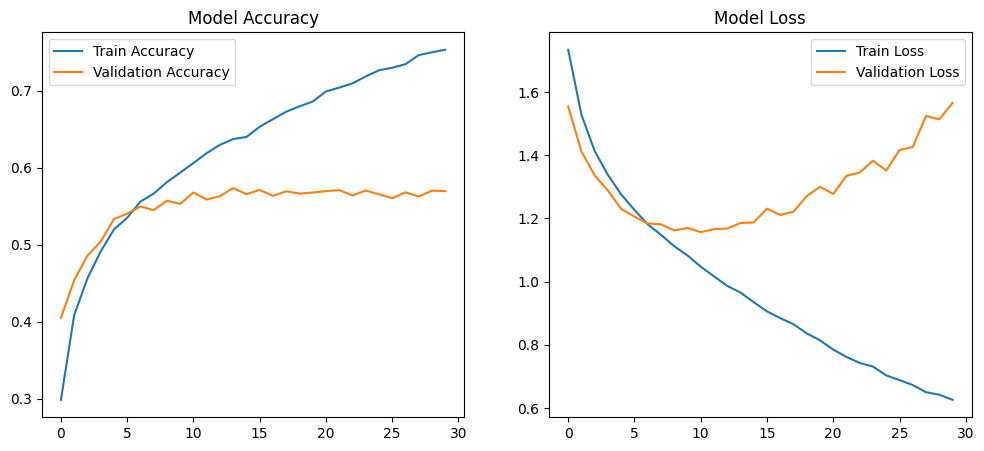

In [11]:

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Model Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Model Loss')
plt.show()


# 🧍‍♀️ Real-Time Emotion Detection (Optional)

In [12]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# Load the face detector
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
emotion_dict = ['Angry','Disgust','Fear','Happy','Neutral','Sad','Surprise']

# Load your model (example)
# model = load_model('emotion_model.h5')

# Upload your video file to Colab/Kaggle and put its path here
cap = cv2.VideoCapture('/content/test_video.mp4')

if not cap.isOpened():
    print("❌ Cannot open video file")
else:
    print("✅ Video file opened successfully")

while True:
    ret, frame = cap.read()
    if not ret:
        print("Video finished or cannot read frame.")
        break

    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)

    for (x, y, w, h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_gray = cv2.resize(roi_gray, (48, 48))
        roi = roi_gray.reshape(1, 48, 48, 1) / 255.0
        # prediction = model.predict(roi)
        # emotion_label = emotion_dict[np.argmax(prediction)]
        emotion_label = "Happy"  # temporary label for testing

        cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 0), 2)
        cv2.putText(frame, emotion_label, (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 
                    1, (0, 255, 0), 2, cv2.LINE_AA)

    cv2_imshow(frame)
    break  # show only one frame for testing

cap.release()
print("✅ Done!")


❌ Cannot open video file
Video finished or cannot read frame.
✅ Done!


In [13]:
import cv2
import numpy as np

# Load the face detector
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
emotion_dict = ['Angry','Disgust','Fear','Happy','Neutral','Sad','Surprise']

# Load your model here (example)
# model = load_model('emotion_model.h5')

# Use video instead of webcam
cap = cv2.VideoCapture('/kaggle/input/test-video-mp4/test_video.mp4.mp4')

if not cap.isOpened():
    print("❌ Cannot open video file")
else:
    print("✅ Video file opened successfully")

while True:
    ret, frame = cap.read()
    if not ret:
        print("Video finished or cannot read frame.")
        break

    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)

    for (x, y, w, h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_gray = cv2.resize(roi_gray, (48, 48))
        roi = roi_gray.reshape(1, 48, 48, 1) / 255.0
        # prediction = model.predict(roi)
        # emotion_label = emotion_dict[np.argmax(prediction)]
        emotion_label = "Happy"  # temporary label for testing

        cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 0), 2)
        cv2.putText(frame, emotion_label, (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 
                    1, (0, 255, 0), 2, cv2.LINE_AA)

    # break after first frame (for testing)
    break

cap.release()
print("✅ Done reading video!")


✅ Video file opened successfully
✅ Done reading video!
